In [1]:
#import necessary libraries
#import necessary libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import tecplot_io as tec
import h5py
import matplotlib.ticker as tck

In [2]:
def diff_central(x, y):
  x0 = x[:-2]
  x1 = x[1:-1]
  x2 = x[2:]
  y0 = y[:-2]
  y1 = y[1:-1]
  y2 = y[2:]
  f = (x2 - x1)/(x2 - x0)
  f1 = (1-f)*(y2 - y1)/(x2 - x1) + f*(y1 - y0)/(x1 - x0)
  f2 = x.copy()
  f2[1:-1] = f1
  f2[0] = f1[0]
  f2[-1] = f1[-1]
  return f2

In [3]:
def find_index(_z, _limits):
  _n = len(_z)
  _i_min = 0
  _i_max = _n - 1
  _limits2 = np.zeros(2)
  if isinstance(_limits, float):
    _limits2[0:2] = _limits
  else:
    _limits2 = _limits
          
  for i in range(_n):
    if _z[i]<_limits2[0] and i>_i_min :
      _i_min = i
    if _z[i]>_limits2[1] and i<_i_max :
      _i_max = i
  #print('zlimits='+str(_limits))
  #print('i_min='+str(_i_min)+', i_max='+str(_i_max))
  
  if isinstance(_limits, float):
    return _i_min
  else:
    return _i_min, _i_max

In [4]:
#parameters
#Declare some variable 
nturbinex = 4
nturbiney = 4
nturbine = 16
#Diameter of turbine
D = 80
#Other variable
Sx = 7
Sy = 7
#kappa = 0.4
#nu = 1.511e-5
#PEX = 1.45444104333
#PEY = 8.72664625997
#hbar = 0.46
#uinfty = 2.54390548295
dt = 0.68543297937
#Rotational angular period
T_turb = 42.84
U_star = 0.356
H_hub = 70
#Mean finite velocity
U = 11.5258407161
tis = 5000
tie = 15000
tii = 100
nti = int((tie - tis) / tii + 1)

In [5]:
#change working directory
path = path = 'd:\post\LASD'
os.chdir(path)
print("current working directory is: {0}".format(os.getcwd()))

current working directory is: d:\post\LASD


In [6]:
for it in range(nti):
    ti = tis + tii * it
    time = ti * dt
    fname = 'DAT_{:010d}.h5'.format(ti)
    f = h5py.File(fname, "r")
    zz = np.array(f["z"][:,0,0]).copy()
    u = f["u"]
    v = f["v"]
    w2 = f["w"]
    w = np.array(w2).copy()
    hh = f['hh']

    NPX = u.shape[2]
    NPY = u.shape[1]
    NPZ = u.shape[0]
   
    if it == 0:
        u_m = np.zeros(u.shape)
        v_m = np.zeros(v.shape)
        w_m = np.zeros(w.shape)

    u_m = u_m + u
    v_m = v_m + v
    w_m = w_m + w

#time average
u_m = u_m / nti
v_m = v_m / nti
w_m = w_m / nti


In [7]:
t = 0
for it in range(0, nti, 4):
    t = t + 1
    print(t)
    ti = tis + tii * it
    time = ti * dt
    fname = 'DAT_{:010d}.h5'.format(ti)
    f = h5py.File(fname, "r")
    zz = np.array(f["z"][:,0,0]).copy()
    u = f["u"]
    v = f["v"]
    w2 = f["w"]
    w = np.array(w2).copy()
    hh = f['hh']

    NPX = u.shape[2]
    NPY = u.shape[1]
    NPZ = u.shape[0]
   
    if it == 0:

        uu_m = np.zeros(u.shape)
        vv_m = np.zeros(v.shape)
        ww_m = np.zeros(w.shape)
        uw_m = np.zeros(u.shape)

    uu_m = uu_m + np.multiply(u,u)
    vv_m = vv_m + np.multiply(v,v)
    ww_m = ww_m + np.multiply(w,w)
    uw_m = uw_m + np.multiply(u,w)

#time average
uu_m = uu_m / t
vv_m = vv_m / t
ww_m = ww_m / t
uw_m = uw_m / t

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [8]:
#split into u array into 16 subarrays
um = u_m.copy()
vm = v_m.copy()
wm = w_m.copy()
uup = uu_m.copy()
vvp = vv_m.copy()
wwp = ww_m.copy()
uwp = uw_m.copy()

um = um.reshape([NPZ, int(NPY/nturbiney), int(NPX/nturbinex), nturbine])
vm = vm.reshape([NPZ, int(NPY/nturbiney), int(NPX/nturbinex), nturbine])
wm = wm.reshape([NPZ, int(NPY/nturbiney), int(NPX/nturbinex), nturbine])
uup = uup.reshape([NPZ, int(NPY/nturbiney), int(NPX/nturbinex), nturbine])
vvp = vvp.reshape([NPZ, int(NPY/nturbiney), int(NPX/nturbinex), nturbine])
wwp = wwp.reshape([NPZ, int(NPY/nturbiney), int(NPX/nturbinex), nturbine])
uwp = uwp.reshape([NPZ, int(NPY/nturbiney), int(NPX/nturbinex), nturbine])

for i in range(4):
    for j in range(4):
        um[:,:,:,4*i+j] = u_m[:,j*48:(j+1)*48,i*48:(i+1)*48]
        vm[:,:,:,4*i+j] = v_m[:,j*48:(j+1)*48,i*48:(i+1)*48]
        wm[:,:,:,4*i+j] = w_m[:,j*48:(j+1)*48,i*48:(i+1)*48]
        uup[:,:,:,4*i+j] = uu_m[:,j*48:(j+1)*48,i*48:(i+1)*48] -  u_m[:,j*48:(j+1)*48,i*48:(i+1)*48] * u_m[:,j*48:(j+1)*48,i*48:(i+1)*48]
                            
        vvp[:,:,:,4*i+j] = vv_m[:,j*48:(j+1)*48,i*48:(i+1)*48] - v_m[:,j*48:(j+1)*48,i*48:(i+1)*48] * v_m[:,j*48:(j+1)*48,i*48:(i+1)*48]
                            
        wwp[:,:,:,4*i+j] = ww_m[:,j*48:(j+1)*48,i*48:(i+1)*48] - w_m[:,j*48:(j+1)*48,i*48:(i+1)*48] * w_m[:,j*48:(j+1)*48,i*48:(i+1)*48]
                            
        uwp[:,:,:,4*i+j] = uw_m[:,j*48:(j+1)*48,i*48:(i+1)*48] - u_m[:,j*48:(j+1)*48,i*48:(i+1)*48] * w_m[:,j*48:(j+1)*48,i*48:(i+1)*48]
                            

u_phase = np.mean(um, axis = 3)
v_phase = np.mean(vm, axis = 3)
w_phase = np.mean(wm, axis = 3)
uu_phase = np.mean(uup, axis = 3)
vv_phase = np.mean(vvp, axis = 3)
ww_phase = np.mean(wwp, axis = 3)
uw_phase = np.mean(uwp, axis = 3)

u_phase_2D = np.zeros([NPZ, NPX])
v_phase_2D = np.zeros([NPZ, NPX])
w_phase_2D = np.zeros([NPZ, NPX])
uu_phase_2D = np.zeros([NPZ, NPX])
vv_phase_2D = np.zeros([NPZ, NPX])
ww_phase_2D = np.zeros([NPZ, NPX])
uw_phase_2D = np.zeros([NPZ, NPX])


u_phase_2D = u_phase[:,23,:]
v_phase_2D = v_phase[:,23,:]
w_phase_2D = w_phase[:,23,:]
uu_phase_2D = uu_phase[:,23,:]
vv_phase_2D = vv_phase[:,23,:]
ww_phase_2D = ww_phase[:,23,:]
uw_phase_2D = uw_phase[:,23,:]

In [9]:
#calculate fluctuation component
for it in range(nti):
    ti = tis + tii * it
    fname = 'DAT_{:010d}.h5'.format(ti)
    f = h5py.File(fname, "r")
    
    zz = np.array(f["z"][:,0,0]).copy()
    u = f["u"]
    v = f["v"]
    w2 = f["w"]
    w = np.array(w2).copy()
    if it == 0:
        u_f = np.zeros(u.shape)
        v_f = np.zeros(v.shape)
        w_f = np.zeros(w.shape)
    u_f = u_f + u - u_m
    v_f = v_f + v - v_m
    w_f = w_f + w - w_m
#time average
u_f = u_f / nti
v_f = v_f / nti
w_f = w_f / nti

Reynolds = - u_f * w_f
Stream_variance = u_f * u_f
Variance_variance = w_f * w_f    



In [10]:
Reynolds_2D = np.mean(Reynolds, axis = 1)
Stream_variance_2D = np.mean(Stream_variance, axis = 1)
Variance_variance_2D = np.mean(Variance_variance, axis = 1)

print(u_phase_2D.shape)

(65, 48)


In [11]:
path  = 'd:\post\LASD\POST_U_2D3_0001'
os.chdir(path)
for it in range(0, nti, 1):
    ti = tis + tii * it
    fname = 'POST_U_2D3_{:010d}_0001.dat'.format(ti)
    f = tec.tecplot_reader(fname, [NPZ, NPX, 6], 2)
    f = f.reshape([NPZ, NPX, 6])
    x = f[:,:,0]
    y = f[:,:,1]
    z = f[:,:,2]
    x_phase = x[:,48:96]
    z_phase = z[:,48:96]
    print(ti,z[0,24])

5000 -0.22835673
5100 -1.2559736
5200 -1.3548441
5300 -0.46416894
5400 0.8291801
5500 1.5153736
5600 0.97806297
5700 -0.29495697
5800 -1.2861551
5900 -1.32988
6000 -0.39925144
6100 0.88803119
6200 1.5176768
6300 0.92171095
6400 -0.36071887
6500 -1.3136866
6600 -1.3021758
6700 -0.33339431
6800 0.94485416
6900 1.5161958
7000 0.86316493
7100 -0.42584047
7200 -1.3389483
7300 -1.2723129
7400 -0.26727595
7500 0.99910691
7600 1.510953
7700 0.80310274
7800 -0.48938535
7900 -1.361141
8000 -1.2396881
8100 -0.20020257
8200 1.0513585
8300 1.5022381
8400 0.74155889
8500 -0.55141153
8600 -1.3802205
8700 -1.2040863
8800 -0.13198649
8900 1.1018305
9000 1.4903273
9100 0.67861339
9200 -0.61228057
9300 -1.3968677
9400 -1.1665538
9500 -0.063982026
9600 1.1492654
9700 1.4746619
9800 0.61440911
9900 -0.6715625
10000 -1.4107128
10100 -1.1267879
10200 0.0040530235
10300 1.1939639
10400 1.4556133
10500 0.54923175
10600 -0.72924485
10700 -1.4217151
10800 -1.0845249
10900 0.072548045
11000 1.2364183
11100 1.4339

In [12]:
print(280*2*np.pi/(2240/12))

9.42477796076938


In [13]:
#x = f[:,:,0]
#y = f[:,:,1]
#z = f[:,:,2]
#x_phase = x[:,0:48]
#z_phase = z[:,0:48]
#print(z[0,:])
print(z[0,24])

-0.78987014


In [14]:
os.chdir('d:\post')
outputfolder = 'post_result/'
#create output folder named 'post_result' 
if not os.path.exists(outputfolder):
    os.makedirs(outputfolder)

x_phase = x_phase.reshape([65*48])
z_phase = z_phase.reshape([65*48])
u_phase_2D = u_phase_2D.reshape([65*48])
v_phase_2D = v_phase_2D.reshape([65*48])
w_phase_2D = w_phase_2D.reshape([65*48])
uu_phase_2D = uu_phase_2D.reshape([65*48])
vv_phase_2D = vv_phase_2D.reshape([65*48])
ww_phase_2D = ww_phase_2D.reshape([65*48])
uw_phase_2D = uw_phase_2D.reshape([65*48])

data = np.zeros([65*48, 9])
data[:,0] = x_phase
data[:,1] = z_phase
data[:,2] = u_phase_2D
data[:,3] = v_phase_2D
data[:,4] = w_phase_2D
data[:,5] = uu_phase_2D
data[:,6] = vv_phase_2D
data[:,7] = ww_phase_2D
data[:,8] = uw_phase_2D

f1 = open( outputfolder + "phase average phi 3.plt",'w')
f1.write("VARIABLES = X, Z, U_phase, v_phase, W_phase, UU_phase, VV_phase,\
         WW_phase, UW_phase  \n")

np.savetxt(f1, data)
f1.close()

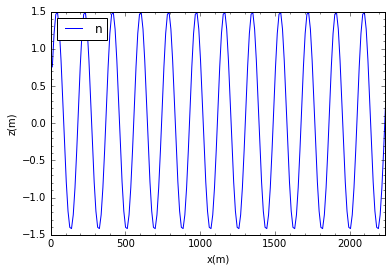

In [15]:
import matplotlib.ticker as tck
plt.style.use('classic')
%matplotlib inline
fig, ax = plt.subplots()
plt.plot(x[0,:], z[0,:] )
plt.xlabel("x(m)")
plt.ylabel("z(m)")
plt.legend('n', loc = 'upper left')
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
plt.xlim([0,2240])
plt.show()